In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [53]:
data=pd.read_csv('C:/Users/navyakiran/Desktop/python/Regression/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [54]:
data.to_csv('sample')   #to save this file

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [56]:
data['date']=pd.to_datetime(data['date'])

In [57]:
data['month']=data['date'].dt.month

In [58]:
data['year']=data['date'].dt.year

In [59]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [60]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,6.574423,2014.322954
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.115308,0.467616
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,2014.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,4.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,6.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,2015.000000


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

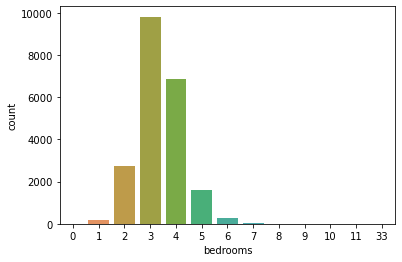

In [61]:
sn.countplot(x='bedrooms',data=data)

<AxesSubplot:xlabel='month', ylabel='count'>

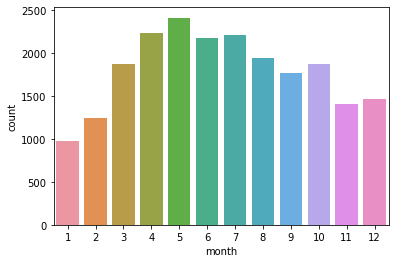

In [62]:
sn.countplot(x='month',data=data)

In [63]:
dscr_columns=[u'bedrooms',u'bathrooms',u'floors',u'waterfront',u'view',u'condition',u'grade',u'month',u'year']

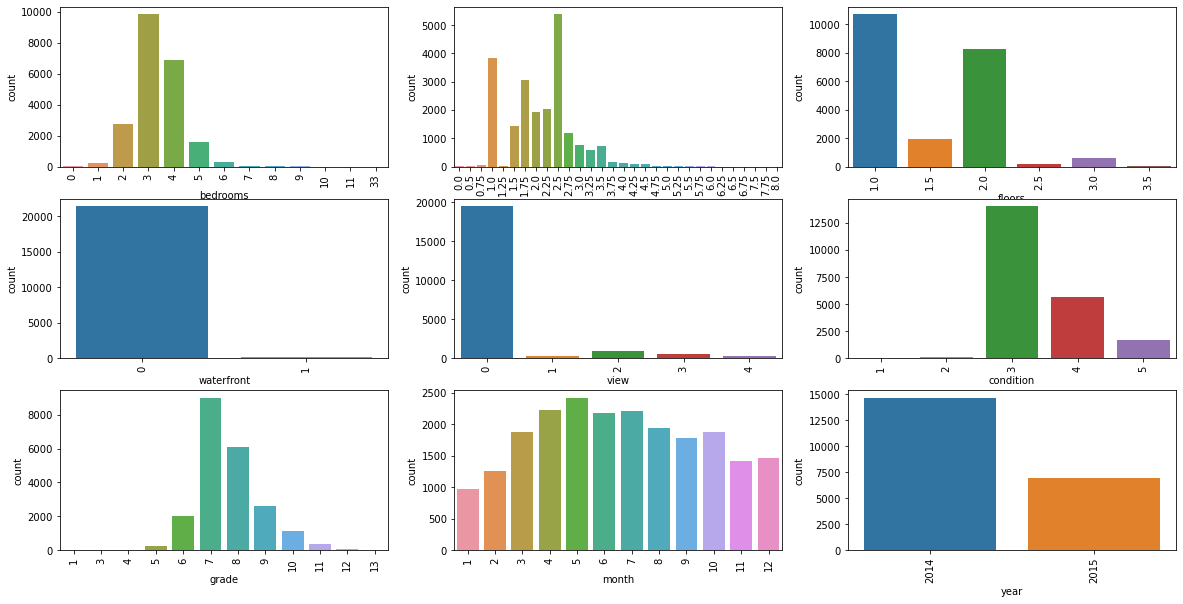

In [64]:
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
for variable, subplot in zip(dscr_columns, ax.flatten()):
    sn.countplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

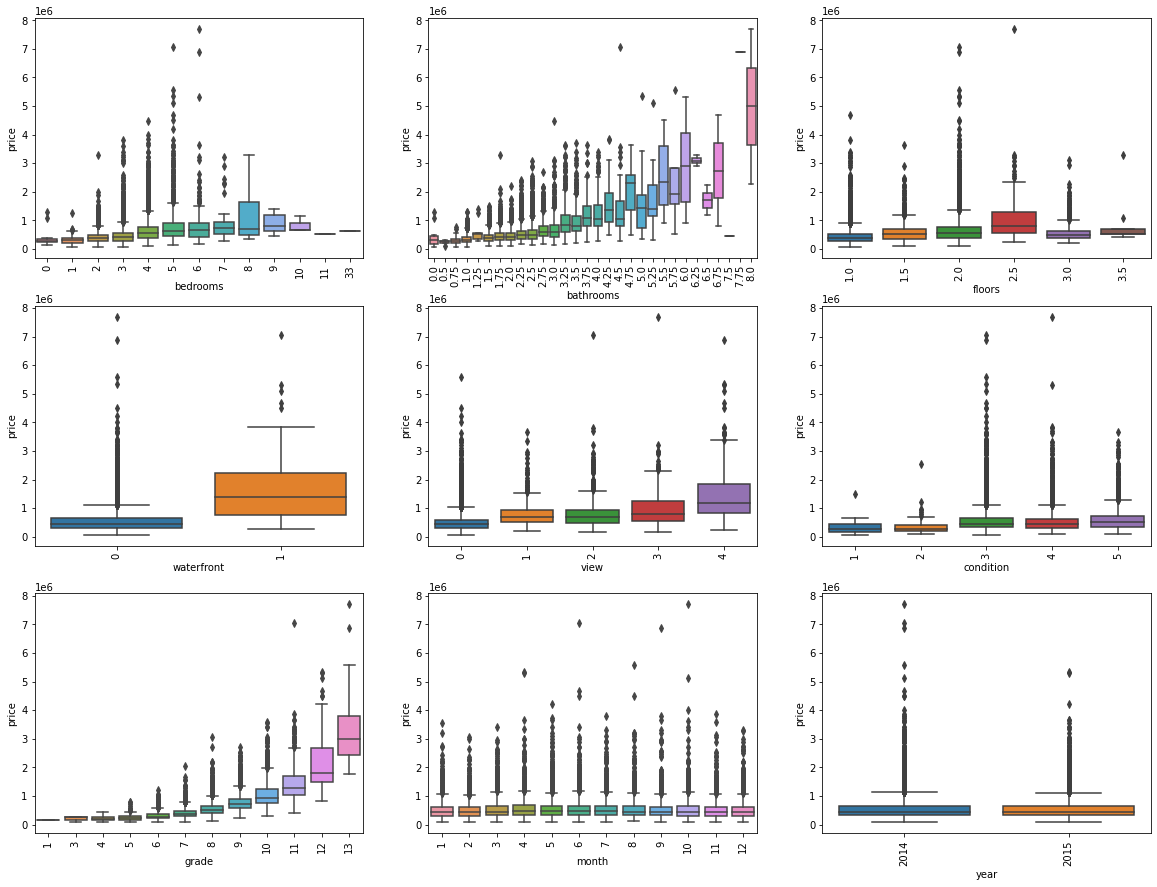

In [65]:
fig, ax=plt.subplots(3,3, figsize=(20,15))
for variable, subplot in zip(dscr_columns, ax.flatten()):
    sn.boxplot(x=variable, y='price', data=data, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        import warnings                         #for ignoring errors, not mandatory can use only when we get errors
        warnings.filterwarnings('ignore')

In [66]:
cont_col=[u'sqft_living',u'sqft_lot',u'sqft_above',u'sqft_basement',u'yr_built',u'yr_renovated',u'zipcode',u'lat',u'long',u'sqft_living15',u'sqft_lot15']

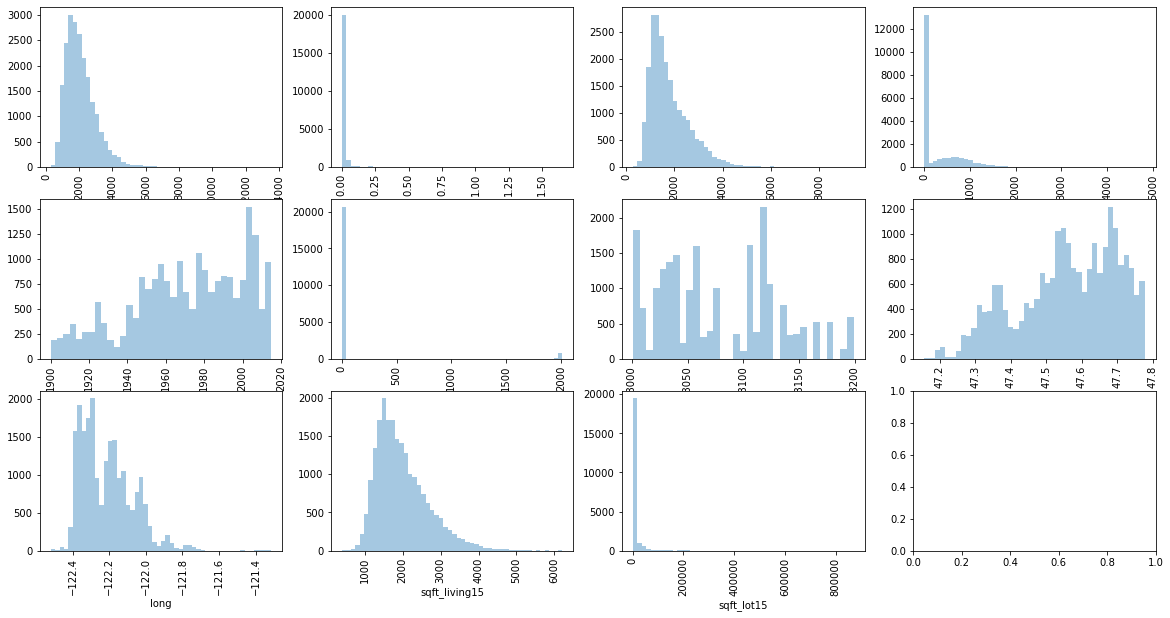

In [67]:
fig, ax=plt.subplots(3,4, figsize=(20,10))
for variable, subplot in zip(cont_col, ax.flatten()):
    sn.distplot(data[variable], ax=subplot,kde=False)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)


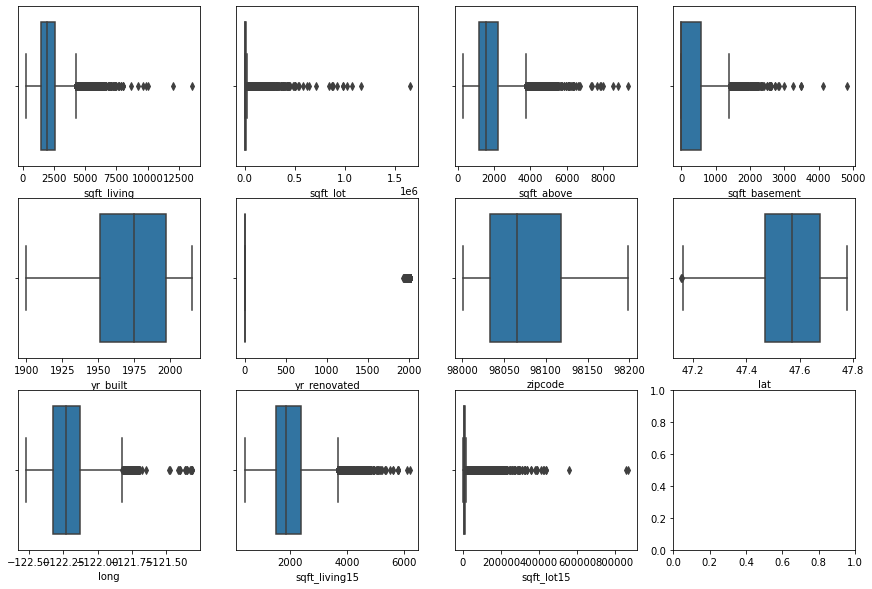

In [68]:
fig, ax=plt.subplots(3,4,figsize=(15, 10))
for variable, subplot in zip(cont_col, ax.flatten()):
    sn.boxplot(data[variable], ax=subplot)

In [69]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,6.574423,2014.322954
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.115308,0.467616
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,2014.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,4.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,6.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,2015.000000


In [70]:
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [71]:
np.where(data['bedrooms']==33), np.where(data['bedrooms']==11)

((array([15870], dtype=int64),), (array([8757], dtype=int64),))

In [72]:
data.iloc[[15870,8757],:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,580,1947,0,98103,47.6878,-122.331,1330,4700,6,2014
8757,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,...,600,1918,1999,98106,47.5560,-122.363,1420,4960,8,2014


In [73]:
data=data.drop(data.index[15870])
data=data.drop(data.index[8757])
data.shape

(21611, 23)

In [74]:
data.iloc[15865:15872]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
15866,2126049265,2014-10-21,495000.0,3,1.75,1770,10080,1.0,0,0,...,0,1968,0,98125,47.7218,-122.306,1860,10456,10,2014
15867,7950304095,2015-02-17,257500.0,1,1.00,710,6060,1.0,0,0,...,0,1916,0,98118,47.5621,-122.283,1440,4545,2,2015
15868,587550010,2015-01-16,570000.0,4,3.50,3990,23544,1.0,0,2,...,1690,1999,0,98023,47.3245,-122.380,3410,15932,1,2015
15869,1402630190,2014-11-11,362000.0,3,2.50,2310,7485,2.0,0,0,...,0,1986,0,98058,47.4390,-122.135,2310,8142,11,2014
15871,3750604417,2014-05-26,172500.0,3,1.00,1140,8800,1.0,0,0,...,0,1972,0,98001,47.2629,-122.275,1270,13560,5,2014
15872,9547202890,2015-01-20,596000.0,2,1.00,1040,4880,1.0,0,0,...,0,1910,1975,98115,47.6809,-122.311,1500,4590,1,2015
15873,2600110250,2015-04-30,840000.0,4,2.50,2170,9796,1.0,0,0,...,520,1980,0,98006,47.5505,-122.152,2350,9796,4,2015


<AxesSubplot:xlabel='price', ylabel='Density'>

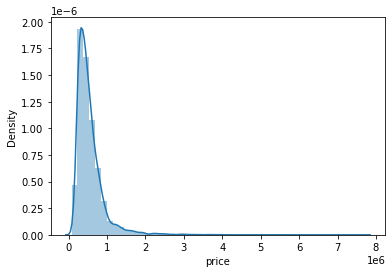

In [75]:
sn.distplot(data['price'])

<AxesSubplot:xlabel='price'>

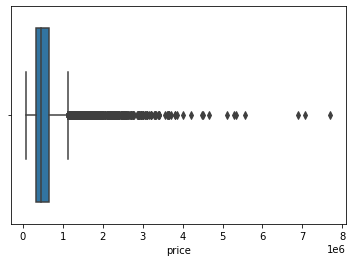

In [76]:
sn.boxplot(data['price'])

<AxesSubplot:xlabel='price', ylabel='Density'>

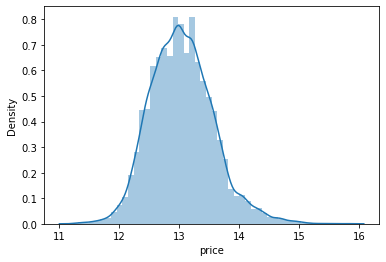

In [77]:
sn.distplot(np.log(data['price']))

<AxesSubplot:xlabel='price'>

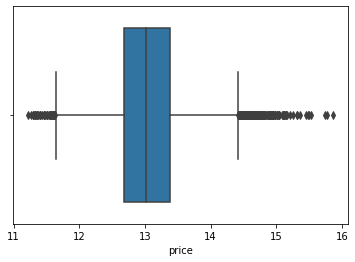

In [78]:
sn.boxplot(np.log(data['price']))

In [79]:
data['price']=np.log(data['price'])

In [80]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,2014-10-13,12.309982,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,2014-12-09,13.195614,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,2015-02-25,12.100712,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,2014-12-09,13.311329,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,2015-02-18,13.142166,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [81]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [82]:
data=data.drop(['id','date'],axis=1)

In [83]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
dtype: int64

In [94]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,12.309982,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,13.195614,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,12.100712,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,13.311329,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,13.142166,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,12.793859,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,5,2014
21609,12.899220,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2,2015
21610,12.904459,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,6,2014
21611,12.899220,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,98027,47.5345,-122.069,1410,1287,1,2015


In [84]:
x=data.drop(['price'],axis=1)
y=data['price']

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
sc=StandardScaler()

In [87]:
x=sc.fit_transform(x)

In [96]:
x

array([[-0.40719123, -1.44741708, -0.97979493, ..., -0.26073127,
         1.0995885 , -0.69070199],
       [-0.40719123,  0.17563612,  0.53364832, ..., -0.18788668,
         1.74156841, -0.69070199],
       [-1.51033901, -1.44741708, -1.42620625, ..., -0.17239485,
        -1.46833111,  1.44780241],
       ...,
       [-1.51033901, -1.77202772, -1.15400423, ..., -0.3941515 ,
        -0.18437131, -0.69070199],
       [-0.40719123,  0.50024676, -0.52249553, ..., -0.42052059,
        -1.78932107,  1.44780241],
       [-1.51033901, -1.77202772, -1.15400423, ..., -0.41795692,
         1.0995885 , -0.69070199]])

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
model=LinearRegression()

In [101]:
model.fit(xtrain,ytrain)

LinearRegression()

In [102]:
y_pred=model.predict(xtest)

In [103]:
a=pd.DataFrame({'actual':ytest, 'predicted':y_pred})
a

,actual,predicted
4982,13.075062,12.817969
10255,12.594731,12.764504
4044,12.505807,12.667723
21271,12.676076,12.868305
10495,12.758520,12.861720
...,...,...
11757,11.982929,12.841422
85,13.753635,13.462581
7708,13.292106,13.132117
167,13.601203,13.417093


In [104]:
from sklearn.metrics import r2_score

In [105]:
r2_score(ytest,y_pred)

0.7702105226570302